# Installation & Imports

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
!pip install -U tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 3.8 MB 32.3 MB/s 
     |████████████████████████████████| 503 kB 36.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=dc53d0e6c08c65e8c953bd860f523a95a0a0b21bbb846f9ad804e0676b2c9790
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Data and Preprocessing

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.dropna(inplace = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df1 = df[df['Class'] == 1]
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [ ]:
df0 = df[df['Class'] == 0].sample(n=5000, random_state=1)
df0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1775,1377,1.315384,-0.044160,0.030803,-0.374108,-0.182137,-0.369705,-0.156686,-0.025748,0.080582,...,-0.115442,-0.354745,-0.065918,-0.442702,0.313711,0.995331,-0.089888,-0.015565,1.85,0.0
5381,5340,-1.548592,-0.064454,0.778314,2.354014,2.428965,-0.988154,-0.578934,0.059530,1.122241,...,-0.402470,-0.532506,-0.471415,-0.602375,0.174808,-0.096288,0.321892,-0.025850,7.55,0.0
1301,1021,0.928194,-1.109748,0.063417,-0.932666,-0.589244,0.531417,-0.489887,0.167473,1.985469,...,0.185421,0.396802,-0.441135,-1.279042,0.654722,-0.434115,0.070377,0.048256,195.00,0.0
2365,1910,-1.129496,1.219960,0.309779,0.160574,-0.452048,-0.033863,-0.044711,1.006086,-0.965042,...,-0.239840,-1.137696,0.295929,-0.374796,-0.954603,0.001955,-0.243133,-0.022968,48.80,0.0
2599,2127,-0.656716,1.067455,1.931015,-0.302225,0.221967,-0.631476,1.192656,-0.569361,0.163354,...,-0.381832,-0.415262,-0.107263,0.508591,-0.230168,-0.034504,-0.013202,-0.432126,9.72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,7232,-0.858963,1.416471,1.954935,1.356072,-0.389605,-0.603968,0.334771,-0.031155,1.033726,...,-0.232415,-0.262665,-0.045103,0.876798,-0.290150,-0.616472,-0.407526,-0.156628,0.75,0.0
672,509,-0.404841,1.005372,1.372756,0.005994,-0.118849,-0.788473,0.566918,0.114721,-0.521987,...,-0.207334,-0.619987,0.020848,0.456775,-0.249289,0.044937,0.234036,0.088356,8.28,0.0
3980,3630,-0.884235,0.993348,1.901040,-0.194557,0.330835,-0.254230,0.839262,-0.173872,1.085489,...,-0.346363,-0.675996,-0.303634,-0.140838,0.519798,0.169280,-0.153101,0.039810,30.36,0.0
6156,7135,-0.481812,1.515797,0.208853,1.008474,-0.040537,1.401936,-2.159645,-5.227156,0.216818,...,-2.727182,0.397706,-0.039062,-0.921931,0.730772,-0.322860,0.068996,0.257444,39.99,0.0


## PCA

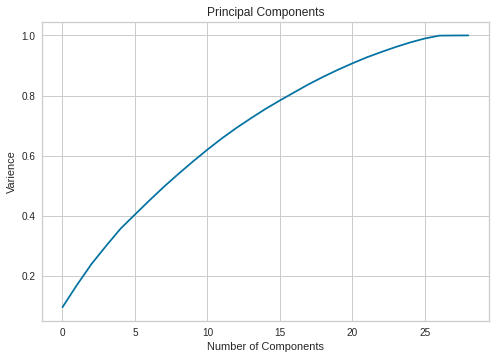

In [ ]:
from sklearn.decomposition import PCA

scaling=StandardScaler()

to_drop = ["Class",'Time']
X0 = df0.drop(to_drop, axis=1).to_numpy()
scaling.fit(X0)
Scaled_data=scaling.transform(X0)
 
# Set the n_components=3
pca=PCA()
pca.fit_transform(Scaled_data)
var = pca.explained_variance_ratio_
plt.figure()
# Almost all the data can be extracted by taking 6th principal component
plt.plot(np.cumsum(var))
plt.xlabel("Number of Components")
plt.ylabel("Varience")
plt.title("Principal Components")
plt.show()

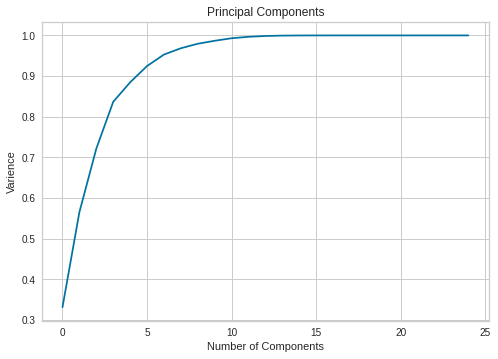

In [ ]:
from sklearn.decomposition import PCA

scaling=StandardScaler()

to_drop = ["Class",'Time']
X1 = df1.drop(to_drop, axis=1).to_numpy()
scaling.fit(X1)
Scaled_data=scaling.transform(X1)
 
# Set the n_components=3
pca=PCA()
pca.fit_transform(Scaled_data)
var = pca.explained_variance_ratio_
plt.figure()
# Almost all the data can be extracted by taking 6th principal component
plt.plot(np.cumsum(var))
plt.xlabel("Number of Components")
plt.ylabel("Varience")
plt.title("Principal Components")
plt.show()

## UMAP

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 34.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e030762629e66453736e442f33478e226596c1bd03461ec8e22fdcd27f9f826a
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a4c76d7048f97f7f3f4a74490af8a9bad5a60a50cf4af2da8574c6f0b97a103e
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


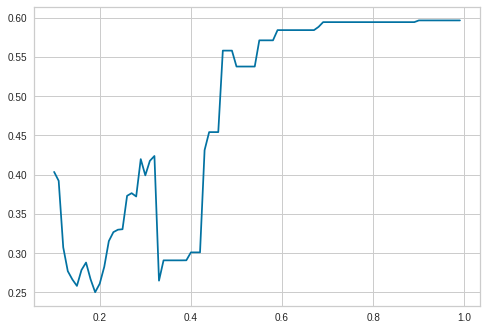

In [ ]:
import umap
scaling=StandardScaler()
scaling.fit(X0)
Scaled_data=scaling.transform(X0)
reducer = umap.UMAP()
Xumap = reducer.fit_transform(Scaled_data)
from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(0.10,1.0,0.01):
    dbscan_umap = DBSCAN(eps=i, metric = 'euclidean').fit(Xumap)
    sh = silhouette_score(Xumap, dbscan_umap.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
_ = plt.plot(sh_arr[:,0],sh_arr[:,1])

In [ ]:
max_index = np.where(sh_arr[:,1] == max(sh_arr[:,1]))
max_sh = sh_arr[max_index,0][0,0]
dbscan_umap = DBSCAN(eps=max_sh, metric = 'euclidean').fit(Xumap)
silhouette_score(Xumap, dbscan_umap.labels_, metric = 'euclidean')

0.59652543

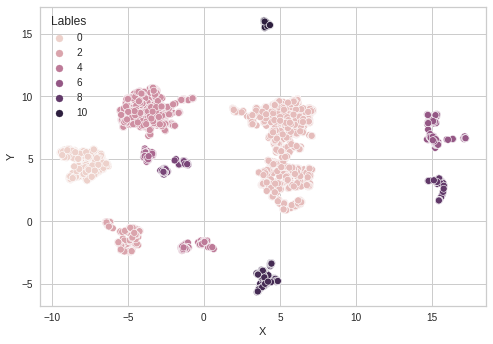

In [ ]:
import seaborn as sns
dbscan_umap_data = np.concatenate([Xumap, dbscan_umap.labels_.reshape(len( dbscan_umap.labels_),1)],axis=1)
dbscan_umap_data = pd.DataFrame(data = dbscan_umap_data,columns = ['X','Y','Lables'])
_= sns.scatterplot(data=dbscan_umap_data, x='X', y="Y", hue="Lables")

In [ ]:
import umap
scaling=StandardScaler()
scaling.fit(X1)
Scaled_data=scaling.transform(X1)
reducer = umap.UMAP()
Xumap1 = reducer.fit_transform(Scaled_data)

from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(0.10,0.5,0.01):
    dbscan_umap1 = DBSCAN(eps=i, metric = 'euclidean').fit(Xumap1)
    sh = silhouette_score(Xumap1, dbscan_umap1.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
_ = plt.plot(sh_arr[:,0],sh_arr[:,1])

In [ ]:
DBSCAN(eps=1, metric = 'euclidean').fit(X1)
np.unique(dbscan_umap1.labels_)

array([-1])

## TSNE

In [ ]:
from sklearn.manifold import TSNE
scaling=StandardScaler()
scaling.fit(X1)
Scaled_data=scaling.transform(X1)
Xtsne1 = TSNE(n_components=2).fit_transform(Scaled_data)
from sklearn.cluster import DBSCAN
sh_list = []
for i in np.arange(1.9,3.0,0.01):
    dbscan_tsne1 = DBSCAN(eps=i, metric = 'euclidean').fit(Xtsne1)
    sh = silhouette_score(Xtsne1, dbscan_tsne1.labels_, metric = 'euclidean')
    sh_list.append([i,sh])
    
sh_arr = np.array(sh_list)
_ = plt.plot(sh_arr[:,0],sh_arr[:,1])

In [ ]:
new_data = pd.read_csv('/content/new_data (1).csv')

In [ ]:
new_data = new_data.iloc[:,1:]
new_data

,X,Y,Lables
0,14.241011,2.372252,0
1,12.587422,3.434279,0
2,10.477040,2.065177,0
3,9.291985,4.902061,0
4,4.509871,-1.385614,0
...,...,...,...
2492,14.805978,1.928994,0
2493,9.970026,4.018586,0
2494,2.974874,-4.333831,1
2495,1.513629,-0.817950,1


## Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = new_data.iloc[:,:-1]
Y = new_data['Lables']
X = sc.fit_transform(X)

# Deep Belief Network

In [ ]:
!git clone https://github.com/albertbup/deep-belief-network.git

Cloning into 'deep-belief-network'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 798 (delta 13), reused 20 (delta 9), pack-reused 763
Receiving objects: 100% (798/798), 183.45 KiB | 5.92 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [ ]:
%cd deep-belief-network
!pwd

/content/deep-belief-network
/content/deep-belief-network


## Initial Model (DBN)

In [ ]:
from dbn.tensorflow import SupervisedDBNClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

classifier = SupervisedDBNClassification(hidden_layers_structure=[50, 50],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.09,
                                         n_epochs_rbm=30,
                                         n_iter_backprop=500,
                                         batch_size=16,
                                         activation_function='relu',
                                         dropout_p=0.2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.055238
>> Epoch 2 finished 	RBM Reconstruction error 0.058672
>> Epoch 3 finished 	RBM Reconstruction error 0.052639
>> Epoch 4 finished 	RBM Reconstruction error 0.056952
>> Epoch 5 finished 	RBM Reconstruction error 0.068054
>> Epoch 6 finished 	RBM Reconstruction error 0.064140
>> Epoch 7 finished 	RBM Reconstruction error 0.054566
>> Epoch 8 finished 	RBM Reconstruction error 0.055805
>> Epoch 9 finished 	RBM Reconstruction error 0.054793
>> Epoch 10 finished 	RBM Reconstruction error 0.056554
>> Epoch 11 finished 	RBM Reconstruction error 0.050124
>> Epoch 12 finished 	RBM Reconstruction error 0.056809
>> Epoch 13 finished 	RBM Reconstruction error 0.054958
>> Epoch 14 finished 	RBM Reconstruction error 0.056694
>> Epoch 15 finished 	RBM Reconstruction error 0.055558
>> Epoch 16 finished 	RBM Reconstruction error 0.051133
>> Epoch 17 finished 	RBM Reconstruction error 0.054393
>> Epoch 18 finished 	RBM Reco

### Confusion Matrix

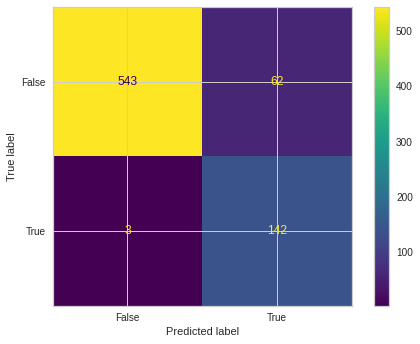

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_curve,auc,confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Classification Report

In [ ]:
print(classification_report(Y_test, Y_pred, labels = [False, True]))

              precision    recall  f1-score   support

       False       0.99      0.90      0.94       605
        True       0.70      0.98      0.81       145

    accuracy                           0.91       750
   macro avg       0.85      0.94      0.88       750
weighted avg       0.94      0.91      0.92       750



In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ROC-AUC Curve

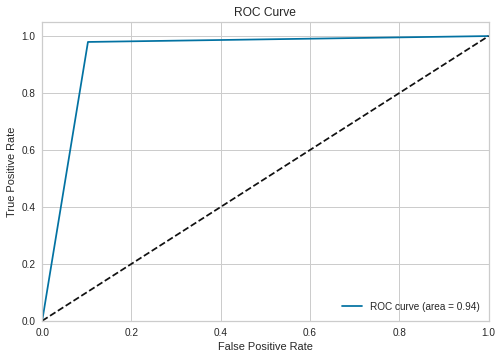

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X =pd.DataFrame(X,index = new_data.index)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Y_pred = pd.DataFrame(classifier.predict(X_test),index = X_test.index)

from sklearn.preprocessing import OneHotEncoder
Y_pred = OneHotEncoder().fit_transform(Y_pred).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


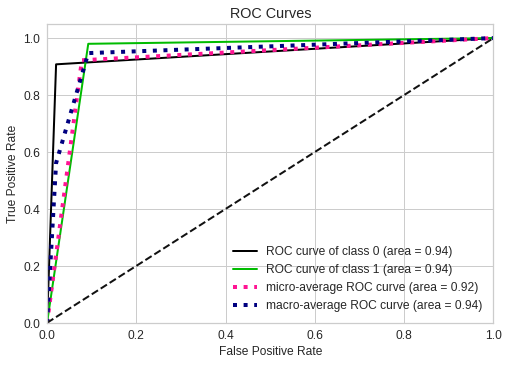

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(Y_test, Y_pred)
plt.show()

### Saving and Testing

In [ ]:
classifier.save('model.pkl')

In [ ]:
!pwd

/content/deep-belief-network/deep-belief-network


In [ ]:
import pickle
classifier = pickle.load(open('/content/model.pkl', 'rb'))

In [ ]:
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

## Final Model (DBN)

In [ ]:
from dbn.tensorflow import SupervisedDBNClassification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

classifier = SupervisedDBNClassification(hidden_layers_structure=[50, 50],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.09,
                                         n_epochs_rbm=30,
                                         n_iter_backprop=500,
                                         batch_size=16,
                                         activation_function='relu',
                                         dropout_p=0.2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))





Instructions for updating:
Use `tf.cast` instead.




[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.054479
>> Epoch 2 finished 	RBM Reconstruction error 0.045588
>> Epoch 3 finished 	RBM Reconstruction error 0.047428
>> Epoch 4 finished 	RBM Reconstruction error 0.056079
>> Epoch 5 finished 	RBM Reconstruction error 0.048722
>> Epoch 6 finished 	RBM Reconstruction error 0.054994
>> Epoch 7 finished 	RBM Reconstruction error 0.042097
>> Epoch 8 finished 	RBM Reconstruction error 0.063729
>> Epoch 9 finished 	RBM Reconstruction error 0.049360
>> Epoch 10 finished 	RBM Reconstruction error 0.047487
>> Epoch 11 finished 	RBM Reconstruction error 0.056010
>> Epoch 12 finished 	RBM Reconstruction error 0.055190
>> Epoch 13 finished 	RBM Reconstruction error 0.058265
>> Epoch 14 finished 	RBM Reconstruction error 0.064287
>> Epoch 15 finished 	RBM Reconstruction error 0.057355
>> Epoch 16 finished 	RBM Reconstruction error 0.050835
>> Epoch 17 finished 	RBM Reconstruction error 0.055175
>> Epoch 18 finished 	RBM Reco

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



>> Epoch 30 finished 	RBM Reconstruction error 0.137217
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 0.461131
>> Epoch 1 finished 	ANN training loss 0.426664
>> Epoch 2 finished 	ANN training loss 0.355609
>> Epoch 3 finished 	ANN training loss 0.293998
>> Epoch 4 finished 	ANN training loss 0.247904
>> Epoch 5 finished 	ANN training loss 0.229439
>> Epoch 6 finished 	ANN training loss 0.226853
>> Epoch 7 finished 	ANN training loss 0.211948
>> Epoch 8 finished 	ANN training loss 0.210958
>> Epoch 9 finished 	ANN training loss 0.218600
>> Epoch 10 finished 	ANN training loss 0.183613
>> Epoch 11 finished 	ANN training loss 0.247566
>> Epoch 12 finished 	ANN training loss 0.193370
>> Epoch 13 finished 	ANN training loss 0.194585
>> Epoch 14 finished 	ANN training loss 0.174603
>> Epoch 15 finished 	ANN training loss 0.166434
>> Epoch 16 finished 	ANN training loss 0.199967
>> Epoch 17 finished 	ANN training loss 0.172581
>> Epoch 18 finished 	

### Confusion Matrix

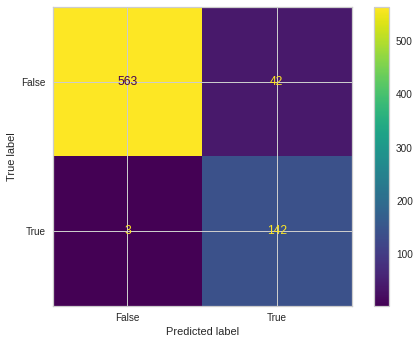

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_curve,auc,confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
cf_matrix = np.array([[563,42],[3,142]])
cf_matrix

array([[563,  42],
       [  3, 142]])

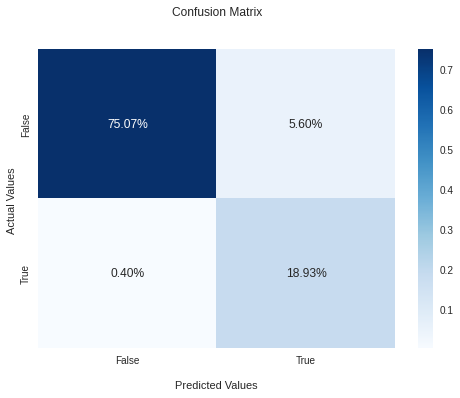

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"])

## Display the visualization of the Confusion Matrix.
plt.show()

### Classification Report

In [ ]:
print(classification_report(Y_test, Y_pred, labels = [False, True]))

              precision    recall  f1-score   support

       False       0.99      0.93      0.96       605
        True       0.77      0.98      0.86       145

    accuracy                           0.94       750
   macro avg       0.88      0.95      0.91       750
weighted avg       0.95      0.94      0.94       750



In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ROC-AUC Curve 

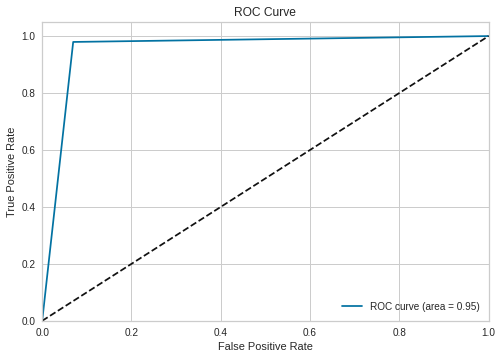

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


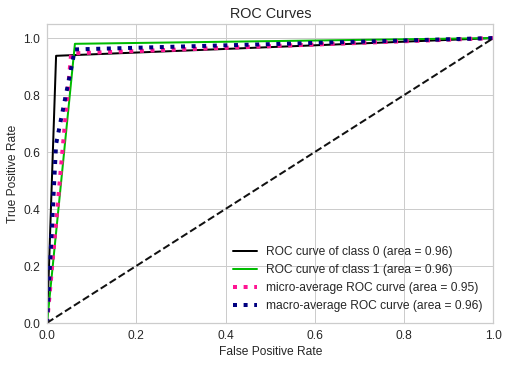

In [ ]:
X =pd.DataFrame(X,index = new_data.index)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Y_pred = pd.DataFrame(classifier.predict(X_test),index = X_test.index)

from sklearn.preprocessing import OneHotEncoder
Y_pred = OneHotEncoder().fit_transform(Y_pred).toarray()
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(Y_test, Y_pred)
plt.show()

# Explainibility using SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.4 MB/s 


In [ ]:
explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:1000,:])

In [ ]:
row_to_show = 5
data_for_prediction = X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


classifier.predict_proba(data_for_prediction_array)

array([[0.00349086, 0.99650913]], dtype=float32)

In [ ]:
f = lambda x: classifier.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test.iloc[0:1000,:])


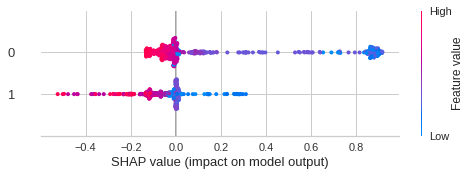

In [ ]:
shap.plots.beeswarm(shap_values)

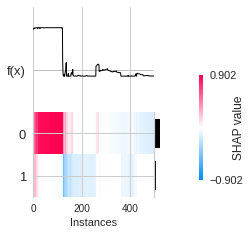

In [ ]:
shap.plots.heatmap(shap_values)

In [ ]:
shap.initjs()
shap.force_plot(explainer, shap_values, X_train)